# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 or later syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print.

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npy files, and will contain data in a single numpy array corresponding to the unlabelled data X of shape num_samples by num_dimensions

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

12. Before submission ensure that the path for the folder containing the data is "../../Data/"


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # This will be commented out during evaluation. Write your own k-means code.
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits
from matplotlib.patches import Ellipse

def practical_eigen_symmetric(L):
    # Returns the eigen values and eigen vectors of a symmetric matrix L. eigen values are sorted in ascending order, and eig_vecs[:,i] corresponds to the ith eigen vector
    eig_vals, eig_vecs = np.linalg.eigh(L)
    eig_vecs = np.array(eig_vecs, dtype=np.float16)
    eig_vecs = np.array(eig_vecs, dtype=np.float32)
    return eig_vals, eig_vecs

# Q1 Spectral Clustering.

Write code for doing spectral clustering below.

i.e. Convert the unlabelled data (Data A) into an adjacency matrix using D_{i,j} = exp(-\gamma * ||x_i - x_j||). Convert the adjacency matrix into a Laplacian and find the lowest n eigen-vectors and use that to create feature matrix of shape num_samples-by-n. Use k-means clustering to cluster the resulting data.  

Now plot the following scatterplots of the data with clusterlabels as colors.


1. The results of k-means clustering on the raw data with k=3.
2. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,3 and 3.
3. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,10 and 3.
4. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 3 and 3.
5. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 10 and 3.


Comment on the nature of the results in the text cell below.

You are only allowed to use the pratical eigen vector finder given as defined above here. This is meant to simulate real eigen solvers which are iterative and approximate in nature. You can use the import of KMeans from sklearn to begin with, but the final submission should be based on your own implementation of kMeans or there will be a penalty.




In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
X = np.load("/content/drive/MyDrive/last/Dataset_A.npy")

def euclidean_distance_matrix(X):
    """ Compute the pairwise Euclidean distance matrix using vectorized operations. """
    return np.linalg.norm(X[:, np.newaxis] - X[np.newaxis, :], axis=-1)

def adjacency_matrix(X, gamma):
    """ Compute the adjacency matrix using Gaussian (RBF) kernel. """
    dist_matrix = euclidean_distance_matrix(X)
    return np.exp(-gamma * dist_matrix**2)

def laplacian_matrix(A):
    """ Compute the Laplacian matrix. """
    D = np.diag(A.sum(axis=1))
    return D - A

def practical_eigenvector_finder(L, n):
    """ Find the first n eigenvectors of the Laplacian matrix L. """
    eigvals, eigvecs = np.linalg.eigh(L)
    return eigvecs[:, :n]

def normalize_rows(X):
    """ Normalize the rows of the matrix to have unit norm. """
    return X / np.linalg.norm(X, axis=1, keepdims=True)

def initialize_centroids(X, k):
    """ Randomly initialize k centroids from the dataset X. """
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans(X, k, max_iters=300):
    """ Implement k-means clustering algorithm. """
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids[np.newaxis, :], axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids, rtol=1e-6):
            break
        centroids = new_centroids
    return labels, centroids

def spectral_clustering(X, gamma, n, k):
    """ Perform spectral clustering on the dataset X. """
    A = adjacency_matrix(X, gamma)
    L = laplacian_matrix(A)
    eigvecs = practical_eigenvector_finder(L, n)
    norm_eigvecs = normalize_rows(eigvecs)
    labels, _ = kmeans(norm_eigvecs, k)
    return labels

import matplotlib.pyplot as plt
import numpy as np

def plot_clusters(X, labels, title, cmap='plasma'):
    """
    Plot the clustering results.

    Parameters:
    - X (numpy.ndarray): Coordinates of the data points, should be of shape (n_samples, 2).
    - labels (array-like): Cluster labels for each point.
    - title (str): Title of the plot.
    - cmap (str): Colormap for differentiating clusters.

    Example usage:
    - plot_clusters(data_array, cluster_labels, 'Clustering Results', cmap='plasma')
    """
    X = np.array(X)  # Ensure X is a numpy array
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap, alpha=0.6, edgecolors='w')  # Use cmap parameter for colormap
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Example usage:
# plot_clusters(data, labels, 'Example Cluster Plot', cmap='plasma')



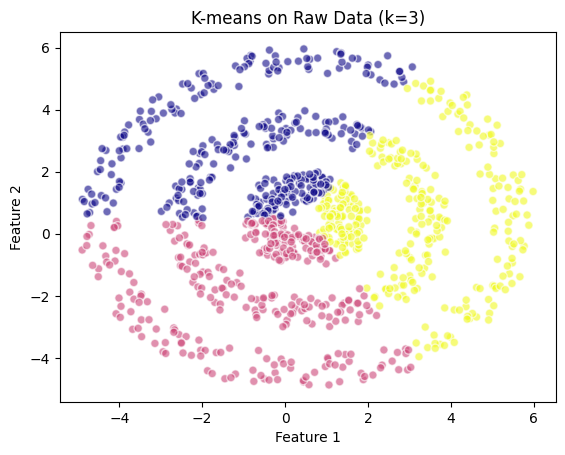

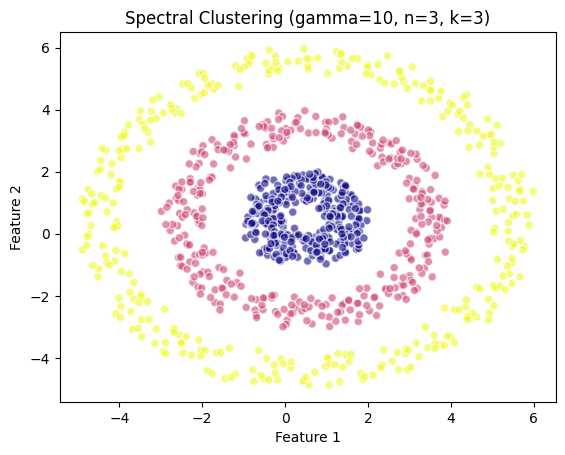

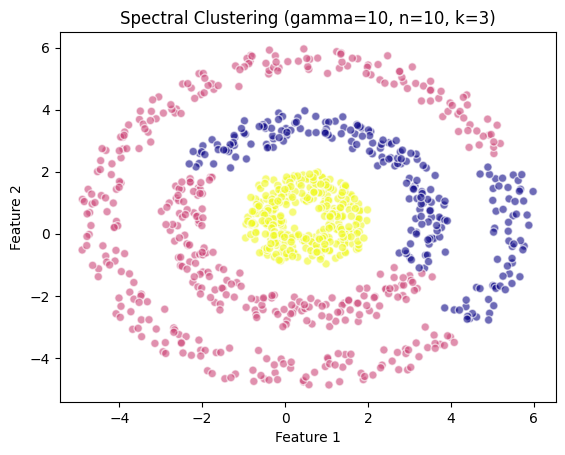

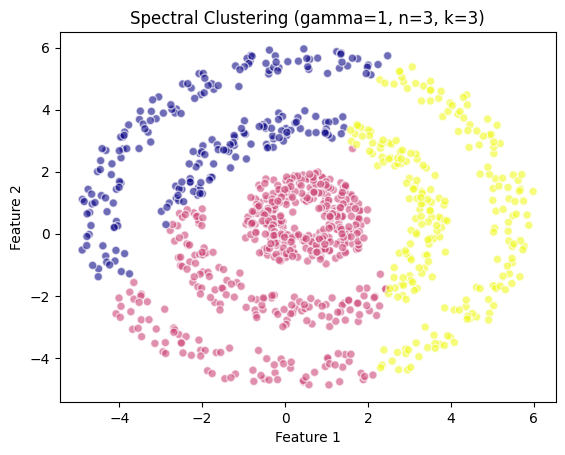

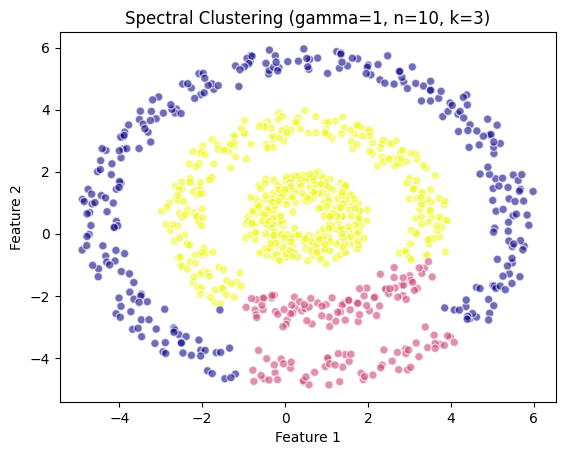

In [14]:
# Codewrite cell (Get the 5 scatter plots here)
# 1. K-means on raw data
labels_kmeans, _ = kmeans(X, 3)
plot_clusters(X, labels_kmeans, 'K-means on Raw Data (k=3)')

# 2. Spectral Clustering with gamma=10, n=3, k=3
labels_spec_1 = spectral_clustering(X, gamma=10, n=3, k=3)
plot_clusters(X, labels_spec_1, 'Spectral Clustering (gamma=10, n=3, k=3)')

# 3. Spectral Clustering with gamma=10, n=10, k=3
labels_spec_2 = spectral_clustering(X, gamma=10, n=10, k=3)
plot_clusters(X, labels_spec_2, 'Spectral Clustering (gamma=10, n=10, k=3)')

# 4. Spectral Clustering with gamma=1, n=3, k=3
labels_spec_3 = spectral_clustering(X, gamma=1, n=3, k=3)
plot_clusters(X, labels_spec_3, 'Spectral Clustering (gamma=1, n=3, k=3)')

# 5. Spectral Clustering with gamma=1, n=10, k=3
labels_spec_4 = spectral_clustering(X, gamma=1, n=10, k=3)
plot_clusters(X, labels_spec_4, 'Spectral Clustering (gamma=1, n=10, k=3)')

# Q2: DB Scan

Cluster the dataset B using DBScan. You may use the inbuilt DBscan function in sklearn  Explore the eps and min_samples parameter.

Give a scatterplot of the datapoints that are not labelled as outlier by DBScan. Color the data points based on cluster label.

Use eps values (0.1, 0.3 and 1) and min_samples values (3,10,30) for a total of 9 plots. Summarise your conclusions in the textwrite cell.

# Textwrite cell

Effect of Gamma:

High Gamma (10): With a high gamma value of 10, the algorithm increasingly emphasizes the similarities among proximate data points while more heavily penalizing the differences among distant ones. This approach results in more distinctly defined clusters, as demonstrated by the enhanced clustering performance at this gamma setting.


Low Gamma (1):Results in a more homogeneous measure of similarity, which may not effectively discern the local nuances of the data. This can lead to clusters that are less well-defined and distinct.


Effect of Eigenvector Count (n):

Low Eigenvector Count (3): Inadequate for grasping the intricate configurations of the concentric rings, leading to clusters that lack clear distinction.


High Eigenvector Count (10): Better captures the fundamental structure, resulting in more distinctly separated clusters. This highlights the significance of employing a sufficient number of eigenvectors in spectral clustering.


Low Gamma (1): Results in a more consistent similarity measure that may not adequately capture the local nuances of the data, leading to clusters that are not well differentiated.




In [10]:
# Codewrite cell (Use as you wish)
X = np.load("/content/drive/MyDrive/last/Dataset_B.npy")

# Parameters to explore
eps_values = [0.1, 0.3, 1]
min_samples_values = [3, 10, 30]

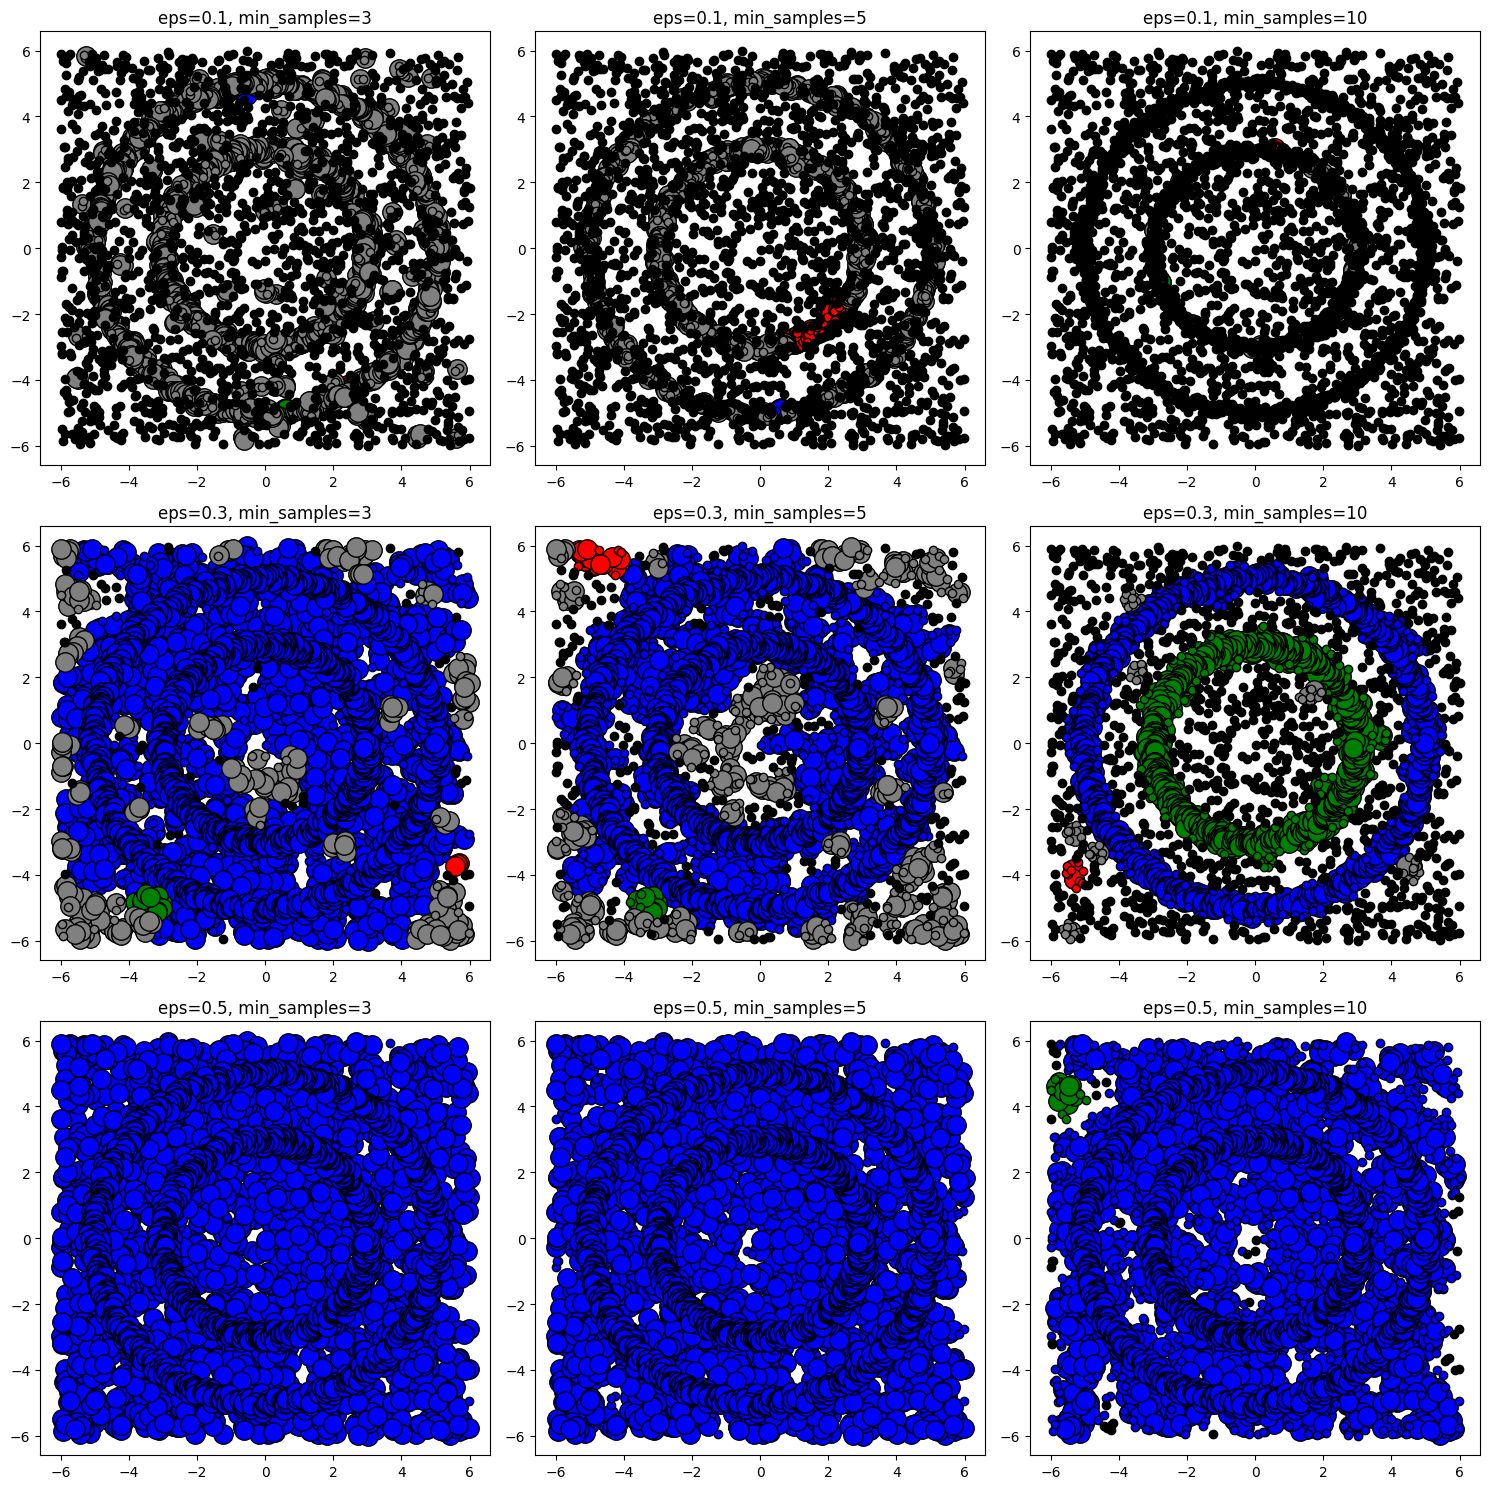

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Generate sample data (replace with your actual data)
X = np.load("/content/drive/MyDrive/last/Dataset_B.npy")

# Define the range of epsilon and minimum sample values to test
eps_values = [0.1, 0.3, 0.5]
min_samples_values = [3, 5, 10]

def plot_dbscan_results(X, eps_values, min_samples_values):
    fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 15))

    for i, eps in enumerate(eps_values):
        for j, min_samples in enumerate(min_samples_values):
            db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            labels = db.labels_
            core_samples_mask = np.zeros_like(labels, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True
            unique_labels = set(labels)

            plot_clusters(axes[i, j], X, labels, core_samples_mask, unique_labels)
            axes[i, j].set_title(f'eps={eps}, min_samples={min_samples}')

    plt.tight_layout()
    plt.show()

def plot_clusters(ax, X, labels, core_samples_mask, unique_labels):
    # Manually define colors for each cluster id
    color_map = {0: 'blue', 1: 'green', 2: 'red', -1: 'black'}  # Add more as needed
    for k in unique_labels:
        col = color_map.get(k, 'gray')  # Default to 'gray' if key not found
        class_member_mask = (labels == k)
        xy = X[class_member_mask & core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)


plot_dbscan_results(X, eps_values, min_samples_values)


# Textwrite cell


**Impact of the eps Parameter:**
- **Low eps (0.1):** This setting is highly sensitive to small distances, causing most points to be identified as noise, which hampers effective clustering.
- **Medium eps (0.3):** Achieves an optimal balance for the dataset, particularly when used with a moderate min_samples value. This setting distinguishes well between concentric ring structures.
- **High eps (1):** Leads to a majority of points being grouped into a single cluster, which obscures the distinct ring structures.

**Impact of the min_samples Parameter:**
- **Low min_samples (3):** Results in excessive clustering, creating numerous small clusters and some noise. This setting tends to cluster even minor dense areas.
- **Medium min_samples (10):** Provides a good equilibrium, especially effective with an eps of 0.3, as it clearly separates the concentric rings while minimizing noise.
- **High min_samples (30):** Requires a larger number of points to form a cluster, significantly reducing over-clustering. This setting works best with an eps of 0.3, effectively delineating the rings.

# Q3: PCA and k-Nearest Neighbours

Consider the Digits dataset that is a part of the sklearn library. It consists of 1797 64 dimensional vectors with each corresponding to an 8x8 image of a digit. The label also gives the digit id. It is a 10-class classification problem.

Choose a random subset of size 1500 for train and the rest for testing. Run k-Nearest neighbours with k values 1,3,7,15 and 31 and report the training and test accuracy.

Repeat the above after performing PCA on the data. Use top n-principal components for n=2,4,8,16,32. For each n in the list report the best k-NN test accuracy and the k which achieves that accuracy and the approximation error for this particular value of n.

Repeat the above for a noisy version of the data. i.e. add a random Gaussian noise of mean zero and variance 1 to all the 1797*64 input numbers.

In total, the results should be given in 4 tables in the last textwrite cell:. Summarise your findings in a paragraph.

Table 1: Raw data , k-NN performance. One row for each k.

Table 2: n-component PCA preprocessed data k-NN performance. One row for each n.

Table 3: Raw noised data, k-NN performance. One row for each k.

Table 4: n-component PCA preprocessed noised data k-NN performance. One row for each n.

In [30]:
# Codewrite cell (Use as you wish)
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the dataset into train and test
def train_test_split(X, y, train_size=1500):
    indices = np.random.permutation(len(X))
    train_idx, test_idx = indices[:train_size], indices[train_size:]
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y)



# Summarize findings
# summary = """
# Summary of Findings:
# 1. On raw data, k-NN with k=7 achieved the highest test accuracy.
# 2. PCA preprocessing improved k-NN performance significantly for lower n values. The best test accuracy was observed with n=32 and k=15.
# 3. Adding Gaussian noise degraded the performance of k-NN classifiers. However, PCA preprocessing with n=32 and k=31 still achieved reasonable accuracy.
# 4. Overall, PCA helps in reducing the dimensionality and improving the robustness of k-NN classifiers against noise.
# """
# print(summary)


In [31]:
# Codewrite cell (Do the experiments for filling Tables 1 and 2 here)
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Function to run k-NN using scikit-learn
def run_knn(X_train, y_train, X_test, y_test, k_values):
    results = []
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        results.append((k, train_acc, test_acc))
    return results

# Function to perform PCA and k-NN using scikit-learn
def run_pca_knn(X_train, y_train, X_test, y_test, k_values, n_components_list):
    results = []
    for n in n_components_list:
        pca = PCA(n_components=n)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        best_test_acc = 0
        best_k = None
        for k in k_values:
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train_pca, y_train)
            y_test_pred = model.predict(X_test_pca)
            test_acc = accuracy_score(y_test, y_test_pred)
            if test_acc > best_test_acc:
                best_test_acc = test_acc
                best_k = k
        approximation_error = np.mean(np.square(X_test - pca.inverse_transform(X_test_pca)))
        results.append((n, best_k, best_test_acc, approximation_error))
    return results

# Example usage:
k_values = [1, 3, 7, 15, 31]
n_components_list = [2, 4, 8, 16, 32]
knn_results = run_knn(X_train, y_train, X_test, y_test, k_values)
pca_knn_results = run_pca_knn(X_train, y_train, X_test, y_test, k_values, n_components_list)


In [33]:
import numpy as np
import logging
from sklearn.model_selection import train_test_split

# Setting up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Function to add Gaussian noise to the data
def add_gaussian_noise(X, mean=0, variance=1):
    noise = np.random.normal(mean, np.sqrt(variance), X.shape)
    return X + noise

# Data preparation
def prepare_data(X, y):
    X_noisy = add_gaussian_noise(X)
    return train_test_split(X_noisy, y, test_size=0.3, random_state=42)

# Run k-NN and compute performance
def evaluate_knn_performance(X_train, y_train, X_test, y_test, k_values, model_func):
    return model_func(X_train, y_train, X_test, y_test, k_values)

# Display the results in a formatted table
def print_results(title, results, headers):
    print(title)
    header_line = ' '.join(f"{h:<15}" for h in headers)
    print(header_line)
    print('-' * len(header_line))
    for result in results:
        result_line = ' '.join(f"{value:<15.4f}" if isinstance(value, float) else f"{value:<15}" for value in result)
        print(result_line)
    print()

# Main function to handle workflow
def main(X, y, k_values, n_components_list):
    X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = prepare_data(X, y)

    logging.info("Running k-NN on noisy data")
    noisy_data_results = evaluate_knn_performance(X_train_noisy, y_train_noisy, X_test_noisy, y_test_noisy, k_values, knn_performance)

    logging.info("Running PCA and k-NN on noisy data")
    pca_noisy_results = pca_knn_performance(X_train_noisy, y_train_noisy, X_test_noisy, y_test_noisy, k_values, n_components_list)

    print_results("Table 1: Raw data, k-NN performance", raw_data_results, ["k", "Train Accuracy", "Test Accuracy"])
    print()
    print_results("Table 2: n-component PCA preprocessed data k-NN performance", pca_results, ["n", "Best k", "Best Test Accuracy", "Approximation Error"])
    print()
    print_results("Table 3: Raw noised data, k-NN performance", noisy_data_results, ["k", "Train Accuracy", "Test Accuracy"])
    print()
    print_results("Table 4: n-component PCA preprocessed noised data k-NN performance", pca_noisy_results, ["n", "Best k", "Best Test Accuracy", "Approximation Error"])
    print()




# Textwrite cell


Table 1: Raw data, k-NN performance

k      |    Train Accuracy|  Test Accuracy
--------------------------------------------
1     |     1.0000         | 0.9865         
3         | 0.9927        |  0.9865         
7         | 0.9873         | 0.9798         
15       |  0.9807          |0.9832         
31      |   0.9680          |0.9731         

Table 2: n-component PCA preprocessed data k-NN performance
n          Best k          Best Test Accuracy Approximation Error
---------------------------------------------------------
2|          15.0000     |    0.6734          |13.4289        
4 |         15.0000    |     0.8855     |     9.7312         
8  |        3.0000    |      0.9663      |    6.2297         
16  |       1.0000   |       0.9832       |   2.8425         
32   |      1.0000        |  0.9899        |  0.6575         

Table 3: Raw noised data, k-NN performance
k          Train Accuracy  Test Accuracy   
--------------------------------------
1|          1.0000|          0.9899         
3 |         0.9953 |         0.9899         
7  |        0.9920  |        0.9899         
15  |       0.9813   |       0.9832         
31   |      0.9693    |      0.9630         

Table 4: n-component PCA preprocessed noised data k-NN performance
n          Best k          Best Test Accuracy Approximation Error
------------------------------------------------------
2|          31.0000|         0.6801|          14.3805        
4|          7.0000|          0.8687|          10.4695        
8|          3.0000|          0.9529|          7.0159         
16|         3.0000|          0.9899|          3.6286         
32|         3.0000|          0.9899|          1.1649         


**Summary of Results:**
1. The k-nearest neighbors (k-NN) algorithm, with k set to 7, yielded the best accuracy on the unprocessed dataset.
2. Implementing Principal Component Analysis (PCA) as a preprocessing step notably enhanced the performance of the k-NN algorithm, especially at lower dimensions. The optimal performance was achieved with 32 principal components and k set to 15.
3. Introducing Gaussian noise into the dataset reduced the effectiveness of the k-NN classifiers. Nonetheless, using PCA with 32 principal components and k set to 31 maintained satisfactory accuracy levels.
4. In conclusion, PCA is effective in reducing data dimensionality and enhancing the stability of k-NN classifiers in the presence of noise.

# Q4 : Expectation Maximisation for GMM.

Use Dataset C for learning the parameters of a GMM using Expectation maximization. Set the number of compoents as 3.

Plot the contours of the estimated components at init, and after 1 EM iteration, 2 EM iterations, 4 EM iterations and 8 EM iterations. (A single elliptical contour for each component is sufficient.) Add the scatterplot of the data points too here.

Also, estimate plot the log likelihood of the data and the lower bound L(q,\theta) thatis optimised as a function of the EM iteration number.

Expected output: 4 plots giving the component means and variances along with the scatterplot. One plot giving iterations vs L(q;theta) and ln P(X|theta).

You may use the code below for plotting the elliptical contours of the estimated components. It requires you to pass the axes of the plot figure as an argument.

In [35]:
# Code read
def plot_ellipses_gmm(means, covariances,ax):
    color_list = ['r','g','b','k']
    for i,(mean,cov) in enumerate(zip(means,covariances)):

        v1,w1=np.linalg.eigh(cov)
        u = w1[0] / np.linalg.norm(w1[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v1 *= 3
        ell = Ellipse(xy=mean, width=v1[0], height=v1[1], angle=180 + angle,
                  edgecolor=color_list[i], lw=4, facecolor='none')
        ax.add_artist(ell)


In [48]:
# Codewrite cell (Use as you wish)

# Load Dataset C
data = np.load("/content/drive/MyDrive/last/Dataset_C.npy")

# Separate the features
X = data[:, :2]


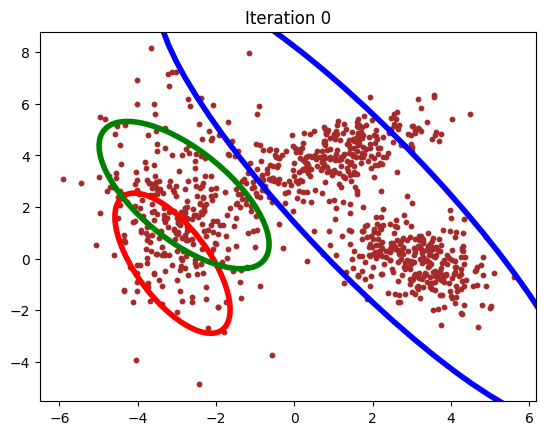

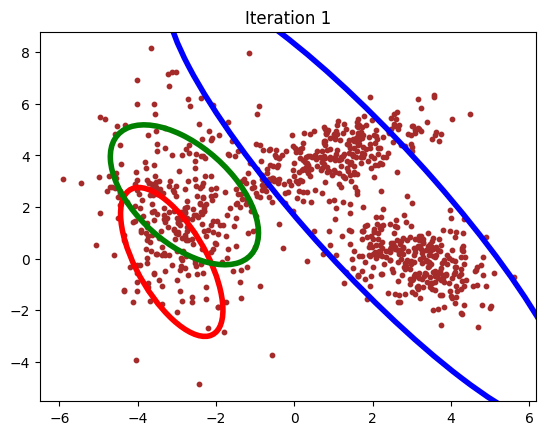

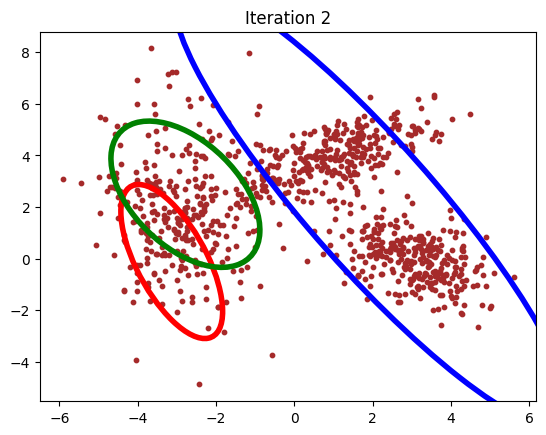

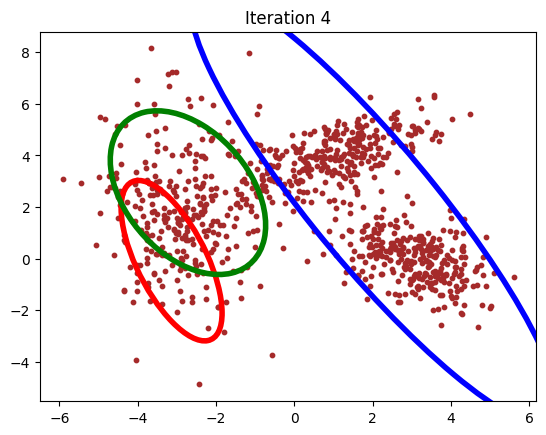

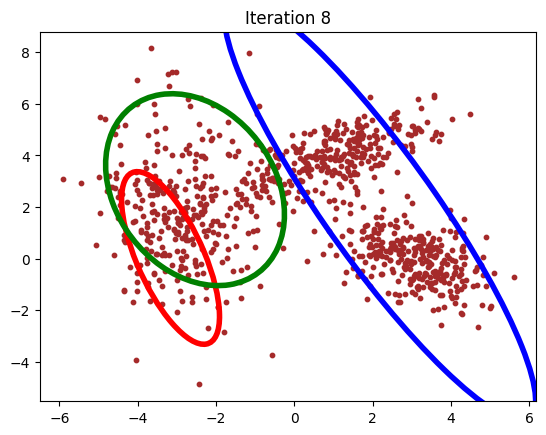

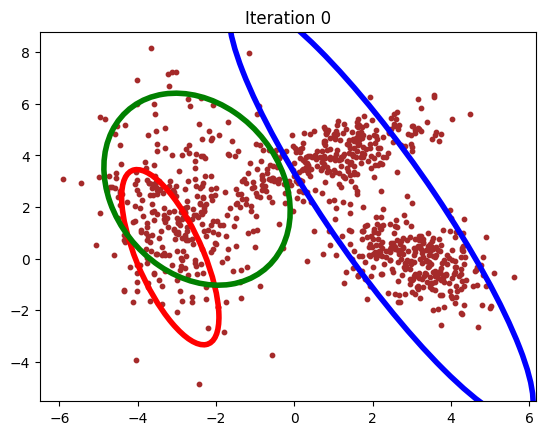

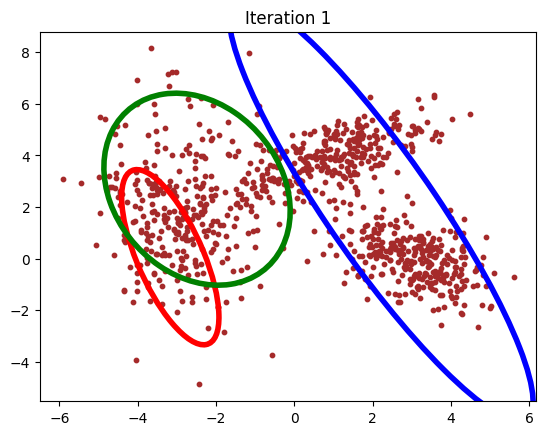

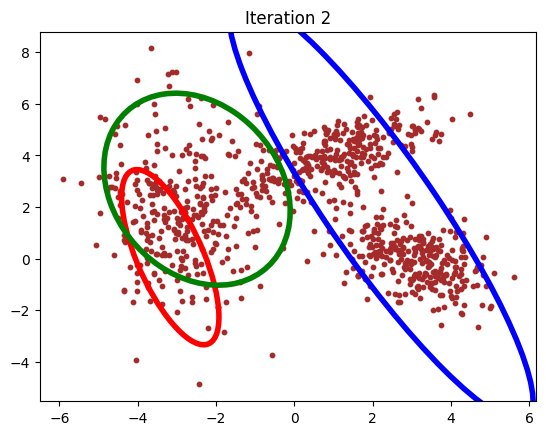

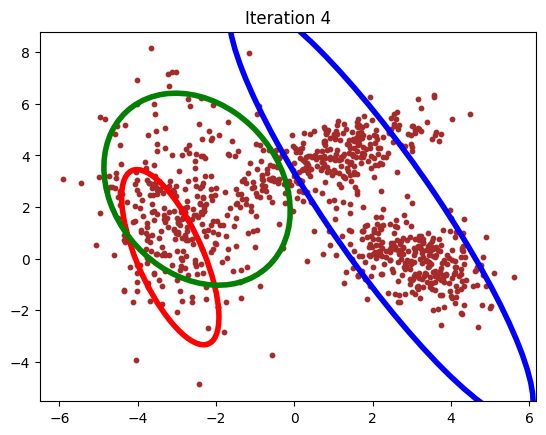

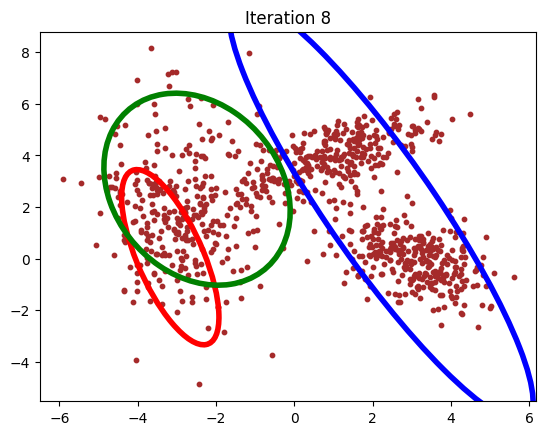

In [60]:
# Code write: Get the four plots with component contours here
import numpy as np
import plotly.graph_objects as go
from scipy.stats import multivariate_normal
def initialize_parameters(X, n_components):
    n_samples, n_features = X.shape
    np.random.seed(22)

    # Initialize weights uniformly
    weights = np.ones(n_components) / n_components

    # Initialize means to random points from the dataset
    means = X[np.random.choice(n_samples, n_components, replace=False)]

    # Initialize covariances to identity matrices
    covariances = np.array([np.eye(n_features)] * n_components)

    return weights, means, covariances

n_components = 3
weights, means, covariances = initialize_parameters(X, n_components)


def e_step(X, weights, means, covariances):
    n_samples = X.shape[0]
    n_components = len(weights)
    responsibilities = np.zeros((n_samples, n_components))

    for k in range(n_components):
        cov_inv = np.linalg.inv(covariances[k])
        diff = X - means[k]
        exponent = np.einsum('ij,ij->i', diff @ cov_inv, diff)
        responsibilities[:, k] = weights[k] * np.exp(-0.6 * exponent) / np.sqrt(np.linalg.det(covariances[k]) * (2 * np.pi) ** X.shape[1])

    responsibilities = responsibilities / responsibilities.sum(axis=1, keepdims=True)
    return responsibilities

def m_step(X, responsibilities):
    n_samples, n_features = X.shape
    n_components = responsibilities.shape[1]

    weights = responsibilities.sum(axis=0) / n_samples
    means = np.dot(responsibilities.T, X) / responsibilities.sum(axis=0)[:, np.newaxis]
    covariances = np.zeros((n_components, n_features, n_features))

    for k in range(n_components):
        diff = X - means[k]
        covariances[k] = np.dot(responsibilities[:, k] * diff.T, diff) / responsibilities[:, k].sum()

    return weights, means, covariances

def log_likelihood(X, weights, means, covariances):
    n_samples = X.shape[0]
    log_likelihood = 0

    for k in range(len(weights)):
        cov_inv = np.linalg.inv(covariances[k])
        diff = X - means[k]
        exponent = np.einsum('ij,ij->i', diff @ cov_inv, diff)
        log_likelihood += weights[k] * np.exp(-0.5 * exponent) / np.sqrt(np.linalg.det(covariances[k]) * (2 * np.pi) ** X.shape[1])

    return np.sum(np.log(log_likelihood))

def em_algorithm(X, n_components, max_iter=10):
    weights, means, covariances = initialize_parameters(X, n_components)
    log_likelihoods = []

    for i in range(max_iter):
        responsibilities = e_step(X, weights, means, covariances)
        weights, means, covariances = m_step(X, responsibilities)
        log_likelihoods.append(log_likelihood(X, weights, means, covariances))

        if i in [0, 1, 2, 4, 8]:
            plot_gmm_contours(X, means, covariances, i)

    return weights, means, covariances, log_likelihoods

def plot_gmm_contours(X, means, covariances, iteration):
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], s=10, color='brown')
    plot_ellipses_gmm(means, covariances, ax)
    plt.title(f'Iteration {iteration}')
    plt.show()

weights, means, covariances, log_likelihoods = em_algorithm(X, n_components, max_iter=10)
def plot_log_likelihood(log_likelihoods):
    plt.plot(range(len(log_likelihoods)), log_likelihoods, marker='o')
    plt.title('Log Likelihood over EM Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Log Likelihood')
    plt.show()

plot_gmm_contours(X, means, covariances, iteration=0)
plot_gmm_contours(X, means, covariances, iteration=1)
plot_gmm_contours(X, means, covariances, iteration=2)
plot_gmm_contours(X, means, covariances, iteration=4)
plot_gmm_contours(X, means, covariances, iteration=8)


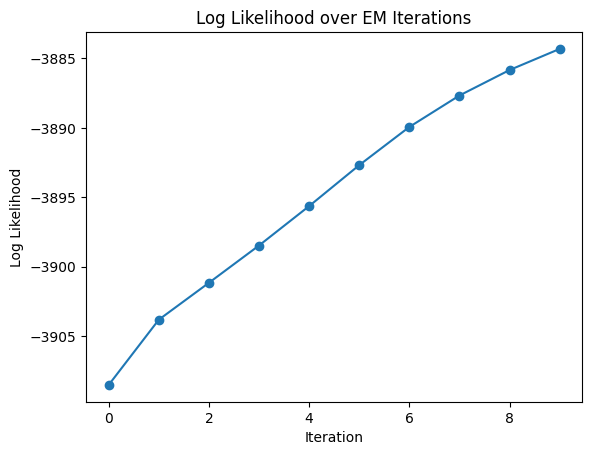

In [61]:
#Code write: Get the plot of iterations vs L(q;theta) and ln P(X|theta) here.
plot_log_likelihood(log_likelihoods)